In [16]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload

sys.path.append('../')
%aimport src.source
%aimport src.plots

from src.source import Simu
from src.plots import plot_profiles, plot_max_abs

In [21]:
%autoreload 1
simu = Simu(    'test4',
                B0=1.4,
                R0=1.0,
                a0=0.25,
                harmonic=2,
                theta_in=np.pi/2,
                omega_b=7.8 * 10**10 * 2 * np.pi,
                W0=0.02,
                Power_in=1,
                vmax=4,
                Nv=100,
                Nr=200,
                Ne0=2.0e19,
                Te0=2.0e3 * 1.602e-19
                )


In [22]:
simu.compute()

iR 101
iR 100
iR 99
iR 97
iR 95
iR 94
iR 93
iR 92
iR 91
iR 90
iR 89


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
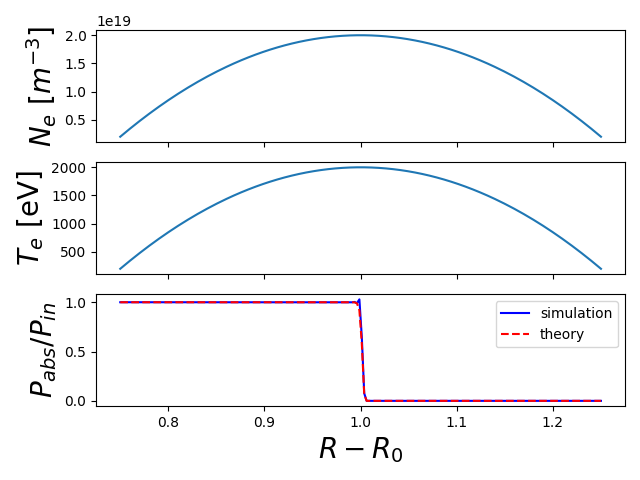

In [24]:
%autoreload 1
plot_profiles('test4')
plt.tight_layout()

/home/sascha/Documents/M2PPF/regroupement/hands-on/numerical_models/notebooks/../src/plots.py:137: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  iR_max = np.argmax(dP_on_dR)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
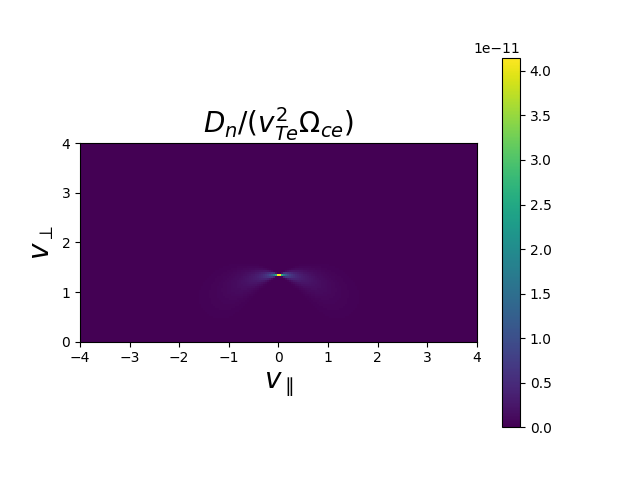

In [33]:
%autoreload 1
plot_max_abs('test4')

<ipython-input-32-63a8e9aadb7e>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolor(Vpar, Vperp, np.transpose(Dn[iR_max,:,:]))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
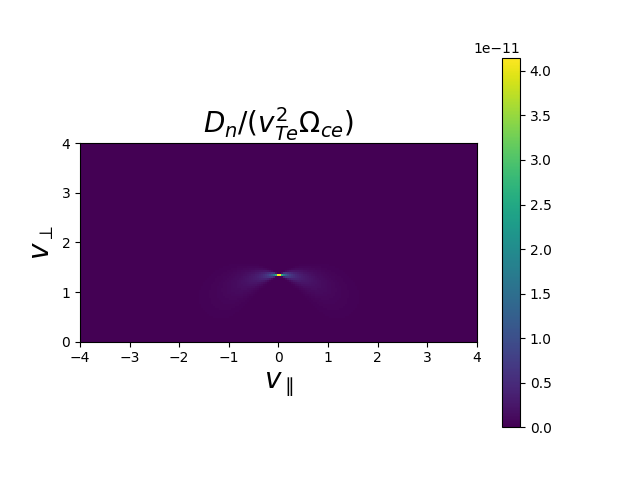

In [32]:
from src.plots import SimuData
simu = SimuData('test4')


fig, ax = plt.subplots()

Vpar  = simu.Vpar
Vperp = simu.Vperp
Dn = simu.Dn
vec_Power = simu.vec_Power

# Compute the position of maximum absorption
dP_on_dR = np.diff(vec_Power)
iR_max = np.argmax(dP_on_dR)
im = plt.pcolor(Vpar, Vperp, np.transpose(Dn[iR_max,:,:]))
ax.set_xlabel("$v_{\parallel}$", fontsize = 20)
ax.set_ylabel("$v_{\perp}$", fontsize = 20)
ax.set_title("$D_{n}/(v_{Te}^2 \Omega_{ce})$", fontsize = 20)
ax.set_aspect('equal','box')
fig.colorbar(im, ax=ax)

In [ ]:
def plot_max_abs(simu_name, ax=None):

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()

    simu = SimuData(simu_name)

    Vpar  = simu.Vpar
    Vperp = simu.Vperp
    Dn = simu.Dn
    vec_Power = simu.vec_Power

    # Compute the position of maximum absorption
    dP_on_dR = np.diff(vec_Power)
    iR_max = np.argmax(dP_on_dR)
    plt.pcolor(Vpar, Vperp, np.transpose(Dn[iR_max,:,:]))
    ax.set_xlabel("$v_{\parallel}$", fontsize = 20)
    ax.set_ylabel("$v_{\perp}$", fontsize = 20)
    ax.set_title("$D_{n}/(v_{Te}^2 \Omega_{ce})$", fontsize = 20)
    ax.set_aspect('equal','box')
    fig.colorbar(ax)